Text(0.5, 1.0, 'split channel diff.')

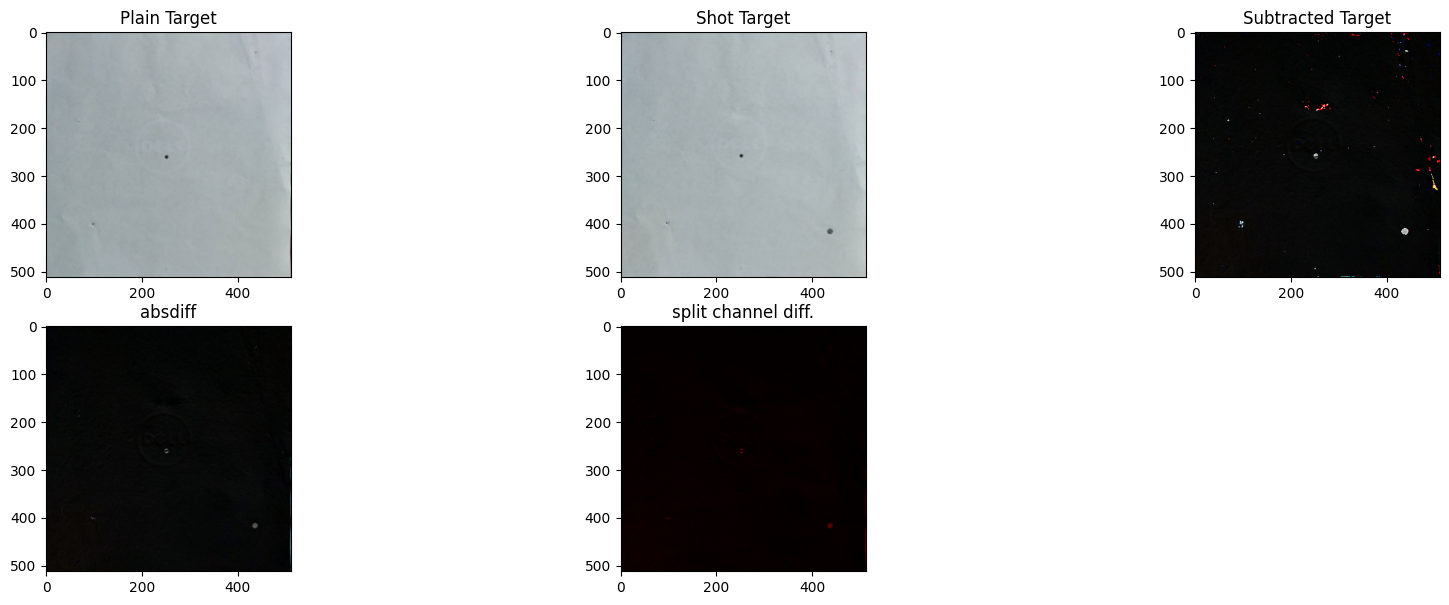

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image

    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    resized = cv2.resize(image, dim, interpolation = inter)

    return resized

def show_image_difference(first_half_image, second_half_image):
  if(first_half_image.shape == second_half_image.shape):

    # Compute the absolute difference between the two images
    diff_image = cv2.absdiff(first_half_image, second_half_image)

    # Split the difference image into its color channels
    b, g, r = cv2.split(diff_image)

    # Combine the color channels into a single image
    zeros = np.zeros(diff_image.shape[:2], dtype=np.uint8)
    diff_image = cv2.merge((b, zeros, zeros))

    return diff_image

  else:
    # Invalid images
    raise ValueError('The images must be of same shape')

shot_target = cv2.imread("/content/shot_target.jpeg")
shot_target = image_resize(shot_target, 512, 512)
# shot_target = cv2.cvtColor(shot_target, cv2.COLOR_BGR2GRAY)
plain_target = cv2.imread("/content/plain_target.jpeg")
plain_target = image_resize(plain_target, 512, 512)
# plain_target = cv2.cvtColor(plain_target, cv2.COLOR_BGR2GRAY)

shot_target_pts1 = np.float32([[27, 20], [492, 12], [33, 487], [495, 494]])
plain_target_pts1 = np.float32([[37, 30], [473, 22], [47, 476], [487, 466]])
pts2 = np.float32([[0, 0], [512, 0], [0, 512], [512, 512]])

shot_target_matrix = cv2.getPerspectiveTransform(shot_target_pts1, pts2)
shot_target_wrapped = cv2.warpPerspective(shot_target, shot_target_matrix, (512, 512))

plain_target_matrix = cv2.getPerspectiveTransform(plain_target_pts1, pts2)
plain_target_wrapped = cv2.warpPerspective(plain_target, plain_target_matrix, (512, 512))

subtracted = shot_target_wrapped - plain_target_wrapped
absdiff = cv2.absdiff(shot_target_wrapped, plain_target_wrapped)
split_channel_diff = show_image_difference(plain_target_wrapped, shot_target_wrapped)

plt.figure(figsize=(21,7))

plt.subplot(2, 3, 1)
plt.imshow(plain_target_wrapped)
plt.title("Plain Target")

plt.subplot(2, 3, 2)
plt.imshow(shot_target_wrapped)
plt.title("Shot Target")

plt.subplot(2, 3, 3)
plt.imshow(subtracted)
plt.title("Subtracted Target")

plt.subplot(2, 3, 4)
plt.imshow(absdiff)
plt.title("absdiff")

plt.subplot(2, 3, 5)
plt.imshow(split_channel_diff)
plt.title("split channel diff.")